<a href="https://colab.research.google.com/github/gopal2812/BoxCars/blob/master/dynamicprogramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Count the number of score combinations**
In an American football game, a play can lead to 2 points (safety), 3 points (field goal), or 7 points (touchdown, assuming the extra point). Many different combinations of 2, 3, and 7 point plays can make up a final score. For example, four combinations of plays yield a score of 12:

6 safeties;
3 safeties, 2 field goals;
1 safety, 1 field goal, and 1 touchdown;
4 field goals.
Write a program that takes a final score and scores for individual plays, and returns the number of combinations of plays that result in the final score.

**Solution**
We can memoize the number of combinations that lead to certain scores, iterating through the memo to arrive at the desired final score and, as a result, the final combination count.

Say we have possible play scores 2 and 3, and we’d like the number of possible plays that could lead to a score of 9. We can represent our memo as a two-dimensional array, where one axis is the score and the other represents the set of plays that can comprise the score, the first index representing, in this case, the set {2} and the second, the set {2,3}.

We note that, for a given score S and a given set of plays P = {P', p}, number of combinations leading to score S N(S, P) equals (informally):

N(S-p, P') + N(S-2p, P') + ... + N(0, P')

We say that N(x, y) = 0 for x<0 and any y.

0	1	2	3	4	5	6	7	8	9
{2}	1	0	1	0	1	0	1	0	1	0
{2,3}	1	0	1	1	1	1	2	1	2	2
A solution that uses this memoization strategy will be O(S \times |P|), where S is the score and P is the set of play scores. Likewise for space.

This solution will work only in cases where different order doesn't contribute new solution.
Repetition are allowed.

In [4]:
def nun_combinations_for_finaI_score(final_score, individual_play_scores):
    num_combinations_for_score = [[1] + [0]*final_score
                                  for i in individual_play_scores]

    for i in range(len(individual_play_scores)):
        for j in range(1, final_score + 1):
            without_this_play = (num_combinations_for_score[i -1][j]
                                 if i >= 1 else 0 )
            with_this_play = (
                              num_combinations_for_score[i][j - individual_play_scores [i]]
                              if j >= individual_play_scores[i] else 0)
            num_combinations_for_score[i] [j] = (without_this_play + with_this_play)
    return num_combinations_for_score

def print_sum(individual_p1ay_scores_x , i, sum, p,num_combinations_for_score):
    if (i < 0):
       return

    if (sum == 0):
       print('cond2', p)
       return

    if (num_combinations_for_score[i][sum]):
        b = []
        print(p, i)
        for j in range(len(p)):
           b.append(p[j])
        print_sum(individual_p1ay_scores_x, i-1, sum, b,num_combinations_for_score)

    if ((sum >= individual_p1ay_scores_x[i]) and (num_combinations_for_score[i][sum])):
         #print('appending',individual_p1ay_scores_x[i], p)
         p.append(individual_p1ay_scores_x[i])
         #print(p)
         print_sum(individual_p1ay_scores_x, i, sum-individual_p1ay_scores_x[i], p,num_combinations_for_score)

final_score_x = 12
p = []
individual_p1ay_scores_x = [2,3,7]
num_combinations_for_score=nun_combinations_for_finaI_score(final_score_x, individual_p1ay_scores_x)
#print(individual_p1ay_scores_x)
#print(len(individual_p1ay_scores_x))
#print(p)
#print(num_combinations_for_score)
print_sum(individual_p1ay_scores_x, len(individual_p1ay_scores_x) -1 , final_score_x, p, num_combinations_for_score)

[] 2
[] 1
[] 0
[2] 0
[2, 2] 0
[2, 2, 2] 0
[2, 2, 2, 2] 0
[2, 2, 2, 2, 2] 0
cond2 [2, 2, 2, 2, 2, 2]
[3] 1
[3, 3] 1
[3, 3] 0
[3, 3, 2] 0
[3, 3, 2, 2] 0
cond2 [3, 3, 2, 2, 2]
[3, 3, 3] 1
cond2 [3, 3, 3, 3]
[7] 2
[7] 1
[7, 3] 1
[7, 3] 0
cond2 [7, 3, 2]


// Printing the combinations is similar to
// https://www.geeksforgeeks.org/perfect-sum-problem-print-subsets-given-sum/
// with one sbtle differece. In the problem above we don't print the repeating
// element while in our case we do.
// Here we have used  2D array. There is another solution with 1D array as
// following
// https://www.geeksforgeeks.org/count-number-ways-reach-given-score-game/

The above problem can also be apply for 0-1 knapsack. Code is a follows. Below code is for 0/1 without repetition.

In [5]:
# A Dynamic Programming based Python Program for 0-1 Knapsack problem 
# Returns the maximum value that can be put in a knapsack of capacity W 
def knapSack(W, wt, val, n): 
    K = [[0 for x in range(W+1)] for x in range(n+1)] 
  
    # Build table K[][] in bottom up manner 
    for i in range(n+1): 
        for w in range(W+1): 
            if i==0 or w==0: 
                K[i][w] = 0
            elif wt[i-1] <= w: 
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]],  K[i-1][w]) 
            else: 
                K[i][w] = K[i-1][w] 
  
    return K[n][W] 
  
# Driver program to test above function 
val = [60, 100, 120] 
wt = [10, 20, 30] 
W = 50
n = len(val) 
print(knapSack(W, wt, val, n)) 

220


This problem is for knapsack solution with recursion. The only difference is consider the dp[i]
too. soln is as follows:
https://www.geeksforgeeks.org/unbounded-knapsack-repetition-items-allowed/

In [7]:
#find maximum 
# achievable value with a knapsack 
# of weight W and multiple instances allowed. 
  
# Returns the maximum value  
# with knapsack of W capacity 
def unboundedKnapsack(W, n, val, wt): 
  
    # dp[i] is going to store maximum  
    # value with knapsack capacity i. 
    dp = [0 for i in range(W + 1)] 
  
    ans = 0
  
    # Fill dp[] using above recursive formula 
    for i in range(W + 1): 
        for j in range(n): 
            if (wt[j] <= i): 
                dp[i] = max(dp[i], dp[i - wt[j]] + val[j]) 
  
    return dp[W] 
  
# Driver program 
W = 100
val = [10, 30, 20] 
wt = [5, 10, 15] 
n = len(val) 
  
print(unboundedKnapsack(W, n, val, wt)) 

300


below program is for the counting the the no of ways to get to a sum to given number.
This can be seen as generalization of fibbonoci series.

This can be seen as the row wise computation.

             |0| 1| 2| 3| 4|
|1 |        | 1 | 1| 1  | 1| 1|

|1,2|       | 1|1|2|3|5|

|1,2,3|   | 1|1|2|4

---



Saving jump.png to jump.png


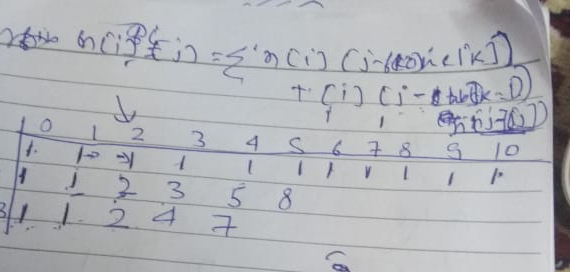

In [0]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image("jump.png", width=600)

In [8]:
def countWaysUtil(n,m):
    res = [0 for x in range(n+1)] # Creates list res witth all elements 0
    res[0],res[1] = 1,1

    for i in range(2,n+1):
        j = 1
        while j<=m and j<=i:
            res[i] = res[i] + res[i-j]
            j = j + 1
    return res

def printpath(s,m,p):
#    print(s,m,p)
    if s<0:
       return

    if s==0:
       print(p)
       return

    j = 1
    while j<=m:
       p.append(j)
       printpath(s -j, m, p)
       p.remove(j)
       j+=1

s,m = 3,3
p = []
res=countWaysUtil(s,m)
print(res)
printpath(s,m,p)

[1, 1, 2, 4]
[1, 1, 1]
[1, 2]
[2, 1]
[3]


Our memoization strategy is as follows. We use a matrix T of the same shape as the input matrix M to track the number of ways to traverse to that point in the input. Matrix T is populated according to function T(i,j), which we define as follows:

T(i,j) = T(i-1,j) + T(i, j-1)
T(i, j) = 0 ∀ j ∈ ℜ, i < 0
T(i, j) = 0 ∀ j < 0, i ∈ ℜ
Our solution then becomes as follows:

def num_traversals(M):
    t = [[0 for _ in M[0]] for _ in M]
    def T(t, i,j):
        if i == -1 or j == -1:
            return 0
        if i == 0 and j == 0:
            return 1
        return t[i-1][j] + t[i][j-1]
    for i in range(0, len(M)):
        for j in range(0, len(M[i])):
            t[i][j] = T(t, i, j)
    return t[len(M)-1][len(M[0])-1]
all([
    num_traversals([[0,0,0,0,0] for _ in xrange(5)]) == 70,
])
This implementation is linear for both time and space with respect to the number of elements in the input matrix.


In [9]:
def levenshtein_distance (A, B):
    def compute_distance_between_prefixes (A_idx , B_idx):
        if A_idx < 0:
        # A is enpty so add a77 of B's characters.
            return B_idx + 1
        elif B_idx < 0:
        # B is enpty so delete a77 of l's characters.
            return A_idx + 1

        if distance_between_prefixes[A_idx] [B_idx] == -1:
            if A[A_idx] == B[B_idx]:
                distance_between_prefixes[A_idx] [B_idx] = (
                    compute_distance_between_prefixes(A_idx - 1, B_idx - 1))
            else:
                substitute_last = compute_distance_between_prefixes (
                    A_idx - 1, B_idx - 1)
                add_last = compute_distance_between_prefixes(A_idx - 1, B_idx)
                delete_last = compute_distance_between_prefixes (
                    A_idx, B_idx - 1)
                distance_between_prefixes[A_idx] [B_idx] = (
                    1 + min(substitute_last, add_last, delete_last))
        return distance_between_prefixes[A_idx][B_idx]


    distance_between_prefixes = [[-1] *len(B) for _ in A]
    return compute_distance_between_prefixes(len(A) - 1, len(B) - 1)

print(levenshtein_distance("","sew"))

3


Variant of this problem 17.2
Varianh Given a stringA, compute the minimum number of characters you need to delete from A to make the resulting string a palindrome.

Saving polindrome.jpg to polindrome (1).jpg


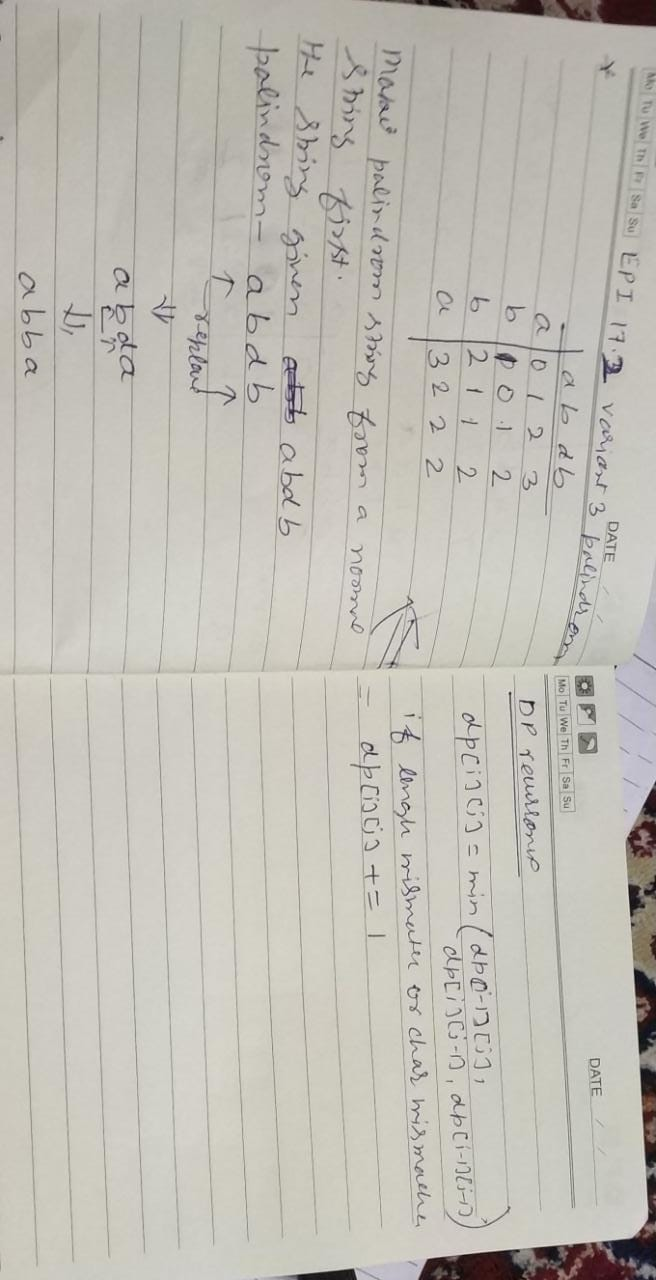

In [0]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image("polindrome.jpg", width=600)



In [0]:
def lcs(X , Y): 
    # find the length of the strings 
    m = len(X) 
    n = len(Y) 
  
    # declaring the array for storing the dp values 
    L = [[None]*(n+1) for i in xrange(m+1)] 
  
    """Following steps build L[m+1][n+1] in bottom up fashion 
    Note: L[i][j] contains length of LCS of X[0..i-1] 
    and Y[0..j-1]"""
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0 : 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1]+1
            else: 
                L[i][j] = max(L[i-1][j] , L[i][j-1]) 
  
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1] 
    return L[m][n] 
#end of function lcs 

Saving lcs.jpg to lcs.jpg


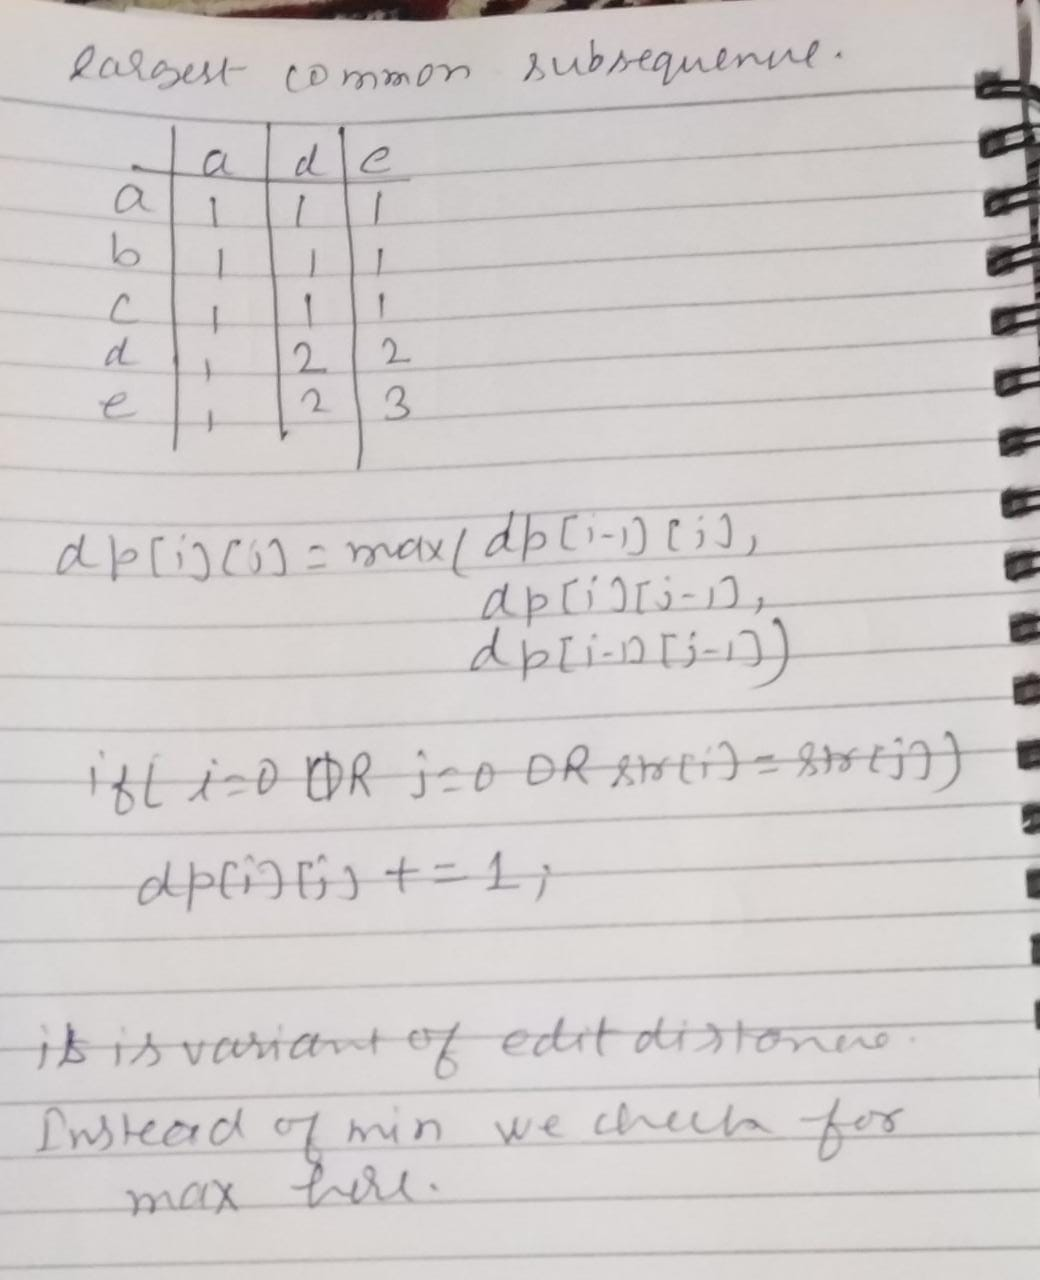

In [3]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image("lcs.jpg", width=600)

// CPP program to find all subsets by backtracking. 
#include <bits/stdc++.h> 
using namespace std; 

// In the array A at every step we have two 
// choices for each element either we can 
// ignore the element or we can include the 
// element in our subset 
void subsetsUtil(vector<int>& A, vector<vector<int> >& res, 
				vector<int>& subset, int index) 
{ 
	for (int i = index; i < A.size(); i++) { 

		// include the A[i] in subset. 
		subset.push_back(A[i]); 
		res.push_back(subset); 

		// move onto the next element. 
		subsetsUtil(A, res, subset, i + 1); 

		// exclude the A[i] from subset and triggers 
		// backtracking. 
		subset.pop_back(); 
	} 

	return; 
} 

// below function returns the subsets of vector A. 
vector<vector<int> > subsets(vector<int>& A) 
{ 
	vector<int> subset; 
	vector<vector<int> > res; 

	// include the null element in the set. 
	res.push_back(subset); 

	// keeps track of current element in vector A; 
	int index = 0; 
	subsetsUtil(A, res, subset, index); 

	return res; 
} 

// Driver Code. 
int main() 
{ 
	// find the subsets of below vector. 
	vector<int> array = { 1, 2, 3 }; 

	// res will store all subsets. 
	// O(2 ^ (number of elements inside array)) 
	// because at every step we have two choices 
	// either include or ignore. 
	vector<vector<int> > res = subsets(array); 

	// Print result 
	for (int i = 0; i < res.size(); i++) { 
		for (int j = 0; j < res[i].size(); j++) 
			cout << res[i][j] << " "; 
		cout << endl; 
	} 

	return 0; 
} 

In [0]:
def subset_l(index, array1, result, subset1):
    for i in range(index,len(array1)):
        subset1.append(array1[i])
        sub=list(subset1)
        result.append(sub)
        subset_l(i+1, array1, result, subset1)
        subset1.remove(array1[i])
    return

array1=[3,4,5]
print(len(array1))
result=[]
subset1=[]

print(subset_l(0, array1,result,subset1))
print(result)

3
None
[[3], [3, 4], [3, 4, 5], [3, 5], [4], [4, 5], [5]]


In [0]:
def permutation(index, array1, result, subset1, level):
    if(level ==len(array1)):
        sub=list(array1)
        result.append(sub)
        print (sub)
        return
    for i in range(level,len(array1)):
        array1[level], array1[i] = array1[i], array1[level]
        permutation(i, array1, result, subset1, level+1)
        array1[level], array1[i] = array1[i], array1[level]
    return

array1=[3,4,5]
print(len(array1))
result=[]
subset1=[]
visited =[False for i in range(len(array1))]

print(permutation(0, array1,result,subset1, 0))
print(result)

3
[3, 4, 5]
[3, 5, 4]
[4, 3, 5]
[4, 5, 3]
[5, 4, 3]
[5, 3, 4]
None
[[3, 4, 5], [3, 5, 4], [4, 3, 5], [4, 5, 3], [5, 4, 3], [5, 3, 4]]


In [0]:
def permutation(index, array1, result, subset1, visited):
    if(len(subset1) ==len(array1)):
        sub=list(subset1)
        result.append(sub)
        return
    for i in range(len(array1)):
        if (visited[i]==False):
            visited[i]=True
            subset1.append(array1[i])
            permutation(i+1, array1, result, subset1, visited)
            subset1.remove(array1[i])
            visited[i]=False
    return

array1=[3,4,5]
print(len(array1))
result=[]
subset1=[]
visited =[False for i in range(len(array1))]

print(permutation(0, array1,result,subset1, visited))
print(result)


3
None
[[3, 4, 5], [3, 5, 4], [4, 3, 5], [4, 5, 3], [5, 3, 4], [5, 4, 3]]


Saving perm.jpg to perm.jpg


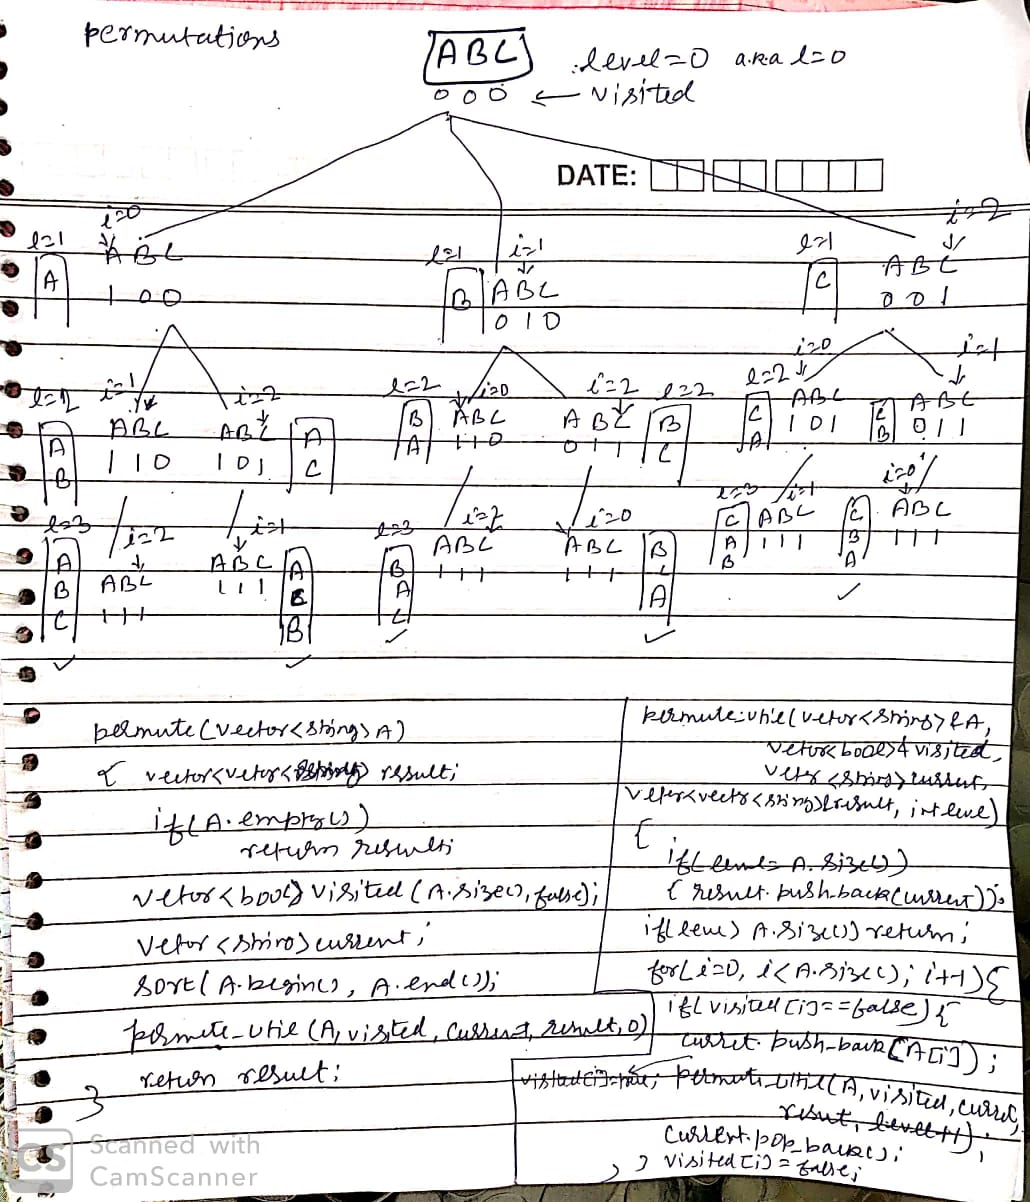

In [2]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image("perm.jpg", width=600)